# Energy Price Prediction

### The dataset has been an aggregated collection of features relating to different type of energies by production method.

#### importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Reading data from the file

In [2]:
df = pd.read_csv('energy_dataset.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [4]:
df.shape

(16569, 29)

In [5]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16569 entries, 0 to 16568
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         16569 non-null  object 
 1   generation biomass                           16552 non-null  float64
 2   generation fossil brown coal/lignite         16552 non-null  float64
 3   generation fossil coal-derived gas           16552 non-null  float64
 4   generation fossil gas                        16552 non-null  float64
 5   generation fossil hard coal                  16552 non-null  float64
 6   generation fossil oil                        16551 non-null  float64
 7   generation fossil oil shale                  16552 non-null  float64
 8   generation fossil peat                       16552 non-null  float64
 9   generation geothermal                        16552 non-null  float64
 10

In [7]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,16552.000000,16552.000000,16552.0,16552.000000,16552.000000,16551.000000,16552.0,16552.0,16552.0,0.0,...,16551.000000,16552.0,16552.000000,16569.000000,0.0,16569.000000,16569.000000,16537.000000,16569.000000,16569.000000
mean,433.164149,431.282262,0.0,5022.886056,4453.370408,310.129418,0.0,0.0,0.0,NaN,...,238.744003,0.0,5498.574795,1470.693222,NaN,5498.758223,28409.930955,28383.909234,44.475656,53.667367
std,91.221395,389.813397,0.0,1728.186065,2168.005375,59.506841,0.0,0.0,0.0,NaN,...,49.556536,0.0,3271.684198,1686.149342,NaN,3259.469267,4554.901644,4519.015573,14.525257,14.955132
min,101.000000,0.000000,0.0,1518.000000,576.000000,87.000000,0.0,0.0,0.0,NaN,...,39.000000,0.0,234.000000,0.000000,NaN,237.000000,18164.000000,18041.000000,2.300000,9.330000
25%,358.000000,0.000000,0.0,3921.000000,2401.750000,271.000000,0.0,0.0,0.0,NaN,...,205.000000,0.0,2890.000000,77.000000,NaN,2908.000000,24523.000000,24549.000000,35.900000,44.170000
50%,448.000000,448.000000,0.0,4597.000000,4839.500000,306.000000,0.0,0.0,0.0,NaN,...,245.000000,0.0,4853.500000,606.000000,NaN,4858.000000,28669.000000,28629.000000,45.020000,53.660000
75%,513.000000,865.000000,0.0,5620.000000,6194.000000,354.000000,0.0,0.0,0.0,NaN,...,273.000000,0.0,7474.250000,2693.000000,NaN,7470.000000,31870.000000,31760.000000,55.440000,64.660000
max,592.000000,997.000000,0.0,16250.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,343.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,40324.000000,85.050000,102.620000


In [8]:
df.isnull().sum()

time                                               0
generation biomass                                17
generation fossil brown coal/lignite              17
generation fossil coal-derived gas                17
generation fossil gas                             17
generation fossil hard coal                       17
generation fossil oil                             18
generation fossil oil shale                       17
generation fossil peat                            17
generation geothermal                             17
generation hydro pumped storage aggregated     16569
generation hydro pumped storage consumption       18
generation hydro run-of-river and poundage        18
generation hydro water reservoir                  17
generation marine                                 18
generation nuclear                                16
generation other                                  17
generation other renewable                        17
generation solar                              

## Null value handling

In [9]:
# dropping "forecast wind offshore eday ahead" and 
# "generation hydro pumped storage aggregated" as they contain only null values

df = df.drop(["generation hydro pumped storage aggregated", 
              "forecast wind offshore eday ahead"], axis = 1)

In [10]:
# dropping rows containing null values
df = df.dropna()

In [11]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16527 entries, 0 to 16568
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         16527 non-null  object 
 1   generation biomass                           16527 non-null  float64
 2   generation fossil brown coal/lignite         16527 non-null  float64
 3   generation fossil coal-derived gas           16527 non-null  float64
 4   generation fossil gas                        16527 non-null  float64
 5   generation fossil hard coal                  16527 non-null  float64
 6   generation fossil oil                        16527 non-null  float64
 7   generation fossil oil shale                  16527 non-null  float64
 8   generation fossil peat                       16527 non-null  float64
 9   generation geothermal                        16527 non-null  float64
 10

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [12]:
df.nunique()

time                                           16527
generation biomass                               420
generation fossil brown coal/lignite             918
generation fossil coal-derived gas                 1
generation fossil gas                           5478
generation fossil hard coal                     6521
generation fossil oil                            312
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage consumption     2796
generation hydro run-of-river and poundage      1586
generation hydro water reservoir                6267
generation marine                                  1
generation nuclear                              1872
generation other                                  96
generation other renewable                        60
generation solar                                4443
generation waste                              

In [13]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9,4861,21785,20264.0,38.41,56.04


In [14]:
# dropping time for now
df = df.drop(['time'], axis = 1)

In [15]:
# dropping columns having only single values
df = df.drop(['generation fossil coal-derived gas', 
             'generation fossil oil shale', 
             'generation fossil peat', 
             'generation geothermal', 
             'generation marine', 
             'generation wind offshore'], axis = 1)

In [16]:
df.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.269333,0.084413,0.493783,0.501004,-0.084706,-0.333251,-0.162166,-0.130755,0.689024,-0.404610,-0.042877,-0.125411,-0.040659,-0.045573,-0.042073,0.142781,0.141721,0.432945,0.459019
generation fossil brown coal/lignite,0.269333,1.000000,0.559411,0.836700,0.362161,-0.365730,-0.521200,-0.219865,-0.073905,0.176195,0.144068,0.061419,0.421326,-0.489034,0.064092,-0.489490,0.286581,0.288229,0.692398,0.452190
generation fossil gas,0.084413,0.559411,1.000000,0.591846,0.355537,-0.442106,-0.286408,0.113439,-0.018597,0.052323,0.338028,0.054442,0.330771,-0.469760,0.063064,-0.470954,0.508284,0.512968,0.691463,0.455885
generation fossil hard coal,0.493783,0.836700,0.591846,1.000000,0.493768,-0.455732,-0.571277,-0.240166,-0.025695,0.332282,0.050921,0.072058,0.368203,-0.525176,0.075260,-0.526793,0.366005,0.368105,0.834051,0.595878
generation fossil oil,0.501004,0.362161,0.355537,0.493768,1.000000,-0.369389,-0.088599,0.138782,-0.062979,0.411941,-0.042906,0.085478,-0.112008,-0.077952,0.086007,-0.080335,0.525350,0.523693,0.505045,0.478884
generation hydro pumped storage consumption,-0.084706,-0.365730,-0.442106,-0.455732,-0.369389,1.000000,0.066210,-0.259599,-0.040797,0.023817,-0.310920,-0.249971,-0.250089,0.381634,-0.258057,0.383353,-0.606973,-0.609581,-0.624625,-0.428538
generation hydro run-of-river and poundage,-0.333251,-0.521200,-0.286408,-0.571277,-0.088599,0.066210,1.000000,0.717449,0.074064,-0.219436,-0.081765,0.056022,-0.514166,0.253256,0.056815,0.253877,0.155904,0.154206,-0.469802,-0.269146
generation hydro water reservoir,-0.162166,-0.219865,0.113439,-0.240166,0.138782,-0.259599,0.717449,1.000000,0.005094,-0.060626,0.067184,0.102247,-0.297514,-0.006301,0.113850,-0.004920,0.519291,0.522876,-0.072796,0.015521
generation nuclear,-0.130755,-0.073905,-0.018597,-0.025695,-0.062979,-0.040797,0.074064,0.005094,1.000000,-0.050943,0.035584,0.026608,0.064792,-0.025912,0.026529,-0.026790,0.125810,0.118475,-0.061192,-0.058056
generation other,0.689024,0.176195,0.052323,0.332282,0.411941,0.023817,-0.219436,-0.060626,-0.050943,1.000000,-0.365915,-0.046674,-0.141582,0.081776,-0.047682,0.081673,0.159563,0.159723,0.241046,0.295537


### plotting heatmap to find relation between independent variable

<AxesSubplot:>

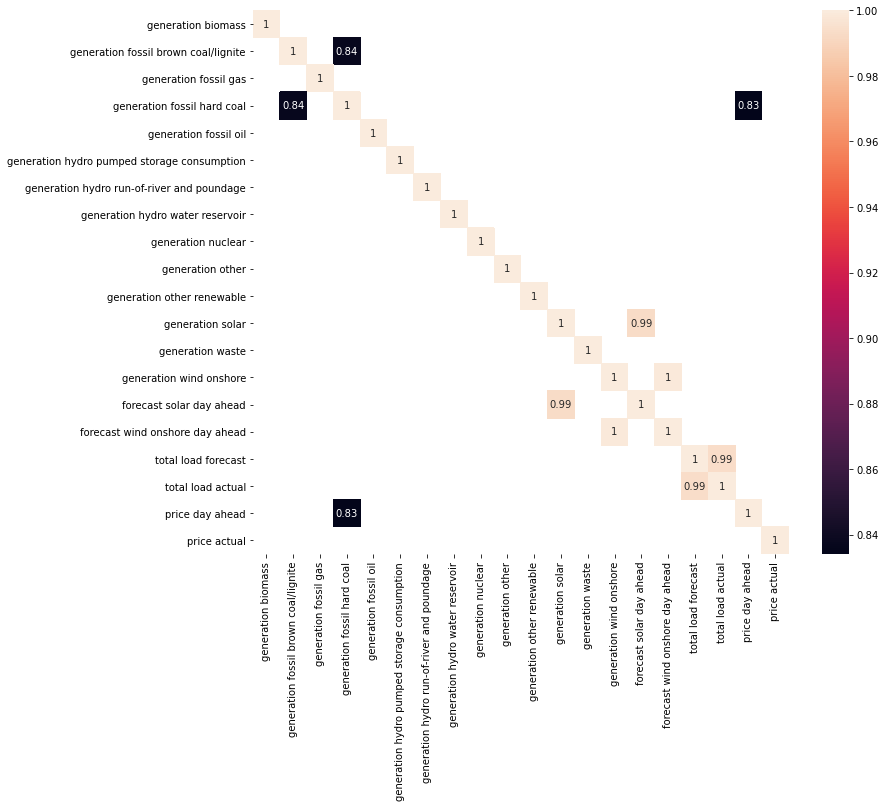

In [17]:
df_corr = df.corr()[df.corr()>=0.75]
df_corr
plt.figure(figsize = (12,10))
sns.heatmap(df_corr,annot=True)

### Dropping columns with high coefficient of relation to remove multicollinearty


In [18]:
# Dropping columns with high coefficient of relation to remove multicollinearty
df = df.drop(["generation fossil hard coal",
             "forecast solar day ahead",
             "forecast wind onshore day ahead",
             "total load forecast"], axis = 1)

In [19]:
correlations = df.corr(method = 'pearson')

### checking correlation with dependent variable

In [20]:
print(correlations['price actual'].sort_values(ascending = False).to_string())

price actual                                   1.000000
price day ahead                                0.733410
generation fossil oil                          0.478884
generation biomass                             0.459019
generation fossil gas                          0.455885
generation fossil brown coal/lignite           0.452190
total load actual                              0.410439
generation other                               0.295537
generation solar                               0.123990
generation waste                               0.025184
generation hydro water reservoir               0.015521
generation nuclear                            -0.058056
generation other renewable                    -0.100459
generation wind onshore                       -0.245027
generation hydro run-of-river and poundage    -0.269146
generation hydro pumped storage consumption   -0.428538


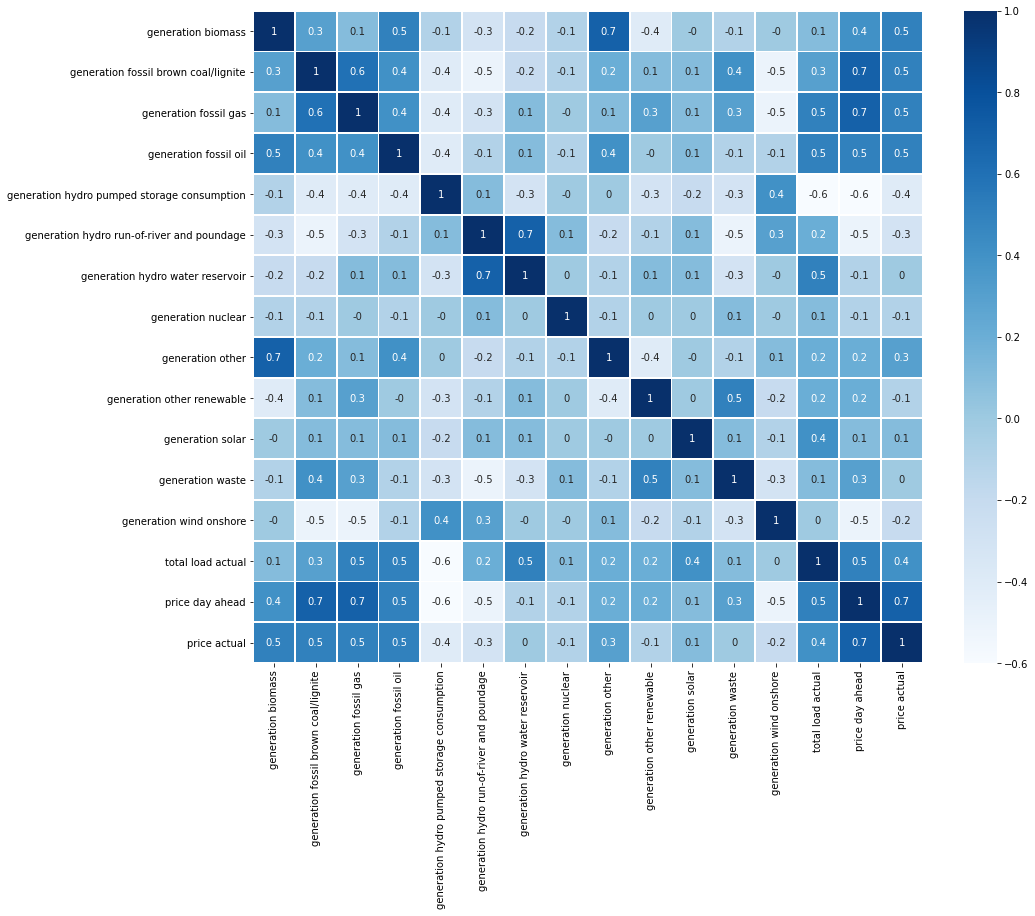

In [21]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.corr(),1),annot=True,
           cmap = 'Blues', linewidth = 0.9)
plt.show()

<AxesSubplot:>

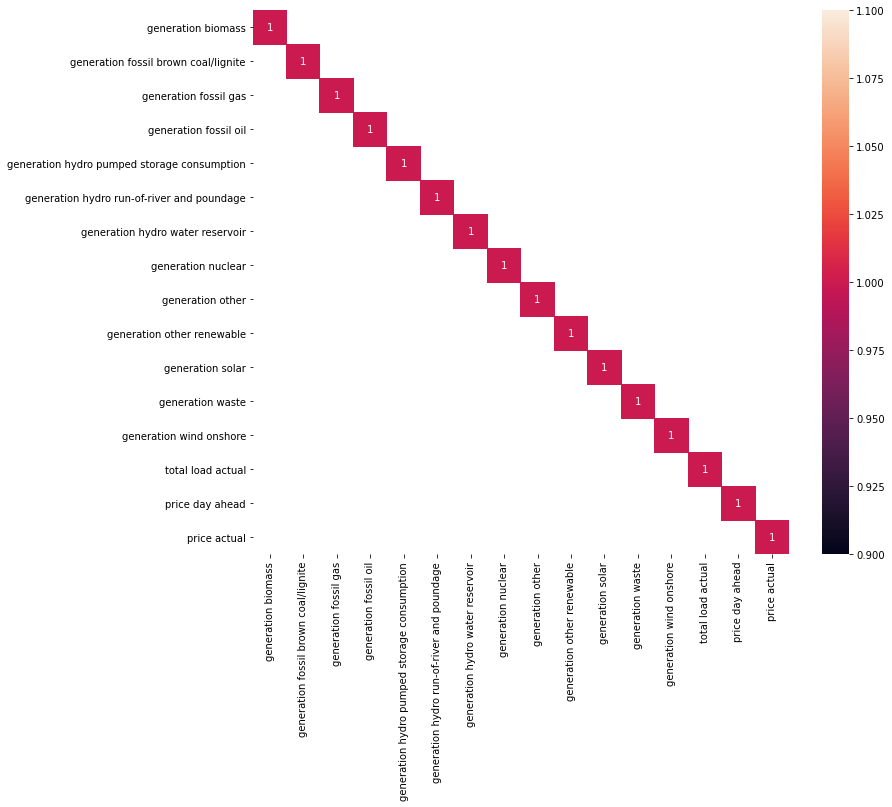

In [22]:
df_corr = df.corr()[df.corr()>=0.75]
df_corr
plt.figure(figsize = (12,10))
sns.heatmap(df_corr,annot=True)

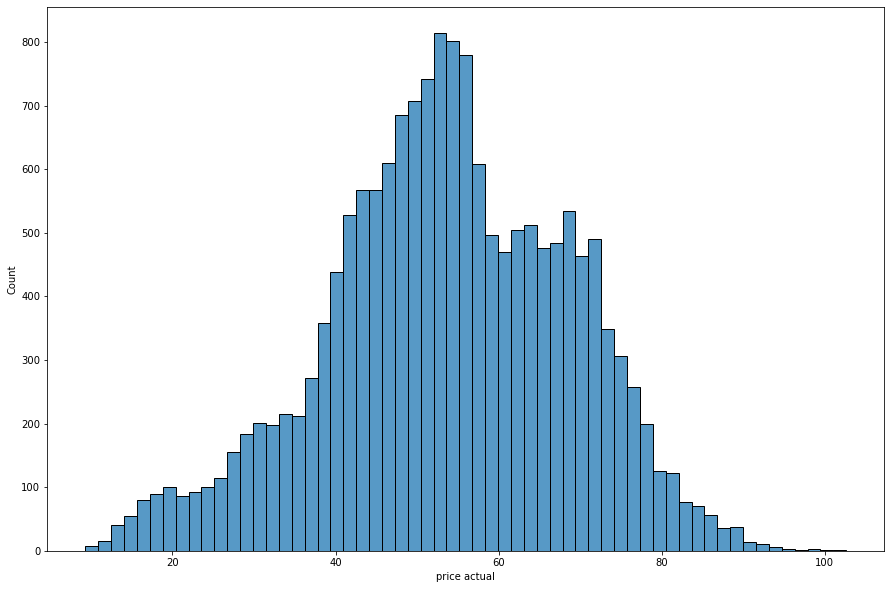

In [23]:
plt.figure(figsize=(15,10))
sns.histplot(df,x='price actual')
plt.show()

### scatterplot 'total load actual' vs 'price actual'

<AxesSubplot:xlabel='total load actual', ylabel='price actual'>

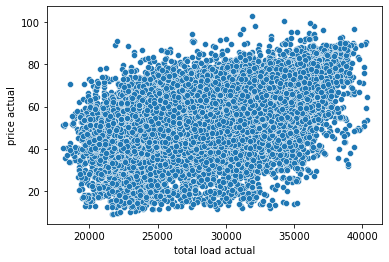

In [24]:
sns.scatterplot(x='total load actual', y = 'price actual', data = df)

## Splitting the data

In [25]:
x = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

## Scaling the data

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# sc = StandardScaler()
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Fitting model

In [29]:
from sklearn.linear_model import Ridge, LinearRegression

### Linear regression

In [30]:
regressor1 = LinearRegression()
regressor1.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor1.predict(x_test)

In [32]:
print('Training Accuracy :', regressor1.score(x_train, y_train))
print('Test Accuracy :', regressor1.score(x_test, y_test))

Training Accuracy : 0.6219832675245587
Test Accuracy : 0.6028319578235033


### Accuracy score of the linear regression model for training set came 62.198% while, for test set it was 60.283%

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6028319578235033

In [34]:
import statsmodels.api as sm
x = sm.add_constant(x)

### summary of the model 

In [35]:
result = sm.OLS(y, x).fit()
# result.summary()

In [37]:
y_train_pred = regressor1.predict(x_train)

In [38]:
# from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score

In [39]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [40]:
def performance(x_train,x_test,y_train,y_test):
    lin_reg = sm.OLS(y_train,sm.add_constant(x_train)).fit()
    y_train_pred = lin_reg.predict(sm.add_constant(x_train))
    y_test_pred = lin_reg.predict(sm.add_constant(x_test))
    print('r2 train:',r2_score(y_train,y_train_pred))
    print('r2 rest:',r2_score(y_test,y_test_pred))
    print('train MAPE:', MAPE(y_train,y_train_pred))
    print('test MAPE:', MAPE(y_test,y_test_pred))
    

### different metrics are deployed in order to analyze the model performance

In [41]:
performance(x_train,x_test,y_train,y_test)

r2 train: 0.6219832675245587
r2 rest: 0.6028319578235034
train MAPE: 15.053010668103978
test MAPE: 14.683174259500909


### Decision Tree

In [42]:
from sklearn import tree
regressor4 = tree.DecisionTreeRegressor()
regressor4.fit(x_train, y_train)


DecisionTreeRegressor()

In [43]:
y_pred4 = regressor4.predict(x_test)

In [44]:
print('Training Accuracy :', regressor4.score(x_train, y_train))
print('Test Accuracy :', regressor4.score(x_test, y_test))

Training Accuracy : 1.0
Test Accuracy : 0.7099626797411538


In [45]:
r2_score(y_test, y_pred4)

0.7099626797411538

### Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor()
regressor2.fit(x_train,y_train)

RandomForestRegressor()

In [47]:
y_pred2 = regressor2.predict(x_test)

In [48]:
print('Training Accuracy :', regressor2.score(x_train, y_train))
print('Test Accuracy :', regressor2.score(x_test, y_test))

Training Accuracy : 0.9816617995132234
Test Accuracy : 0.8680876796453147


In [49]:
r2_score(y_test, y_pred2)

0.8680876796453147

### KNN


In [50]:
from sklearn.neighbors import KNeighborsRegressor
regressor3 = KNeighborsRegressor(n_neighbors = 5, metric = 'minkowski', p = 2)
regressor3.fit(x_train, y_train)

KNeighborsRegressor()

In [51]:
y_pred3 = regressor3.predict(x_test)

In [52]:
print('Training Accuracy :', regressor3.score(x_train, y_train))
print('Test Accuracy :', regressor3.score(x_test, y_test))

Training Accuracy : 0.9195318108562797
Test Accuracy : 0.8638722910388333


In [53]:
r2_score(y_test, y_pred3)

0.8638722910388333

### SVM

In [54]:
from sklearn import svm
regressor5 = svm.SVR()
regressor5.fit(x_train, y_train)

SVR()

In [55]:
y_pred5 = regressor5.predict(x_test)

In [56]:
print('Training Accuracy :', regressor5.score(x_train, y_train))
print('Test Accuracy :', regressor5.score(x_test, y_test))

Training Accuracy : 0.6412046234054531
Test Accuracy : 0.6194324078552728


In [57]:
r2_score(y_test, y_pred5)

0.6194324078552728

### Artificial Neural Network

In [58]:
from sklearn.neural_network import MLPRegressor
regressor6 = MLPRegressor(random_state=1, max_iter=500)
regressor6.fit(x_train, y_train)

MLPRegressor(max_iter=500, random_state=1)

In [59]:
y_pred6 = regressor6.predict(x_test)


In [60]:
print('Training Accuracy :', regressor6.score(x_train, y_train))
print('Test Accuracy :', regressor6.score(x_test, y_test))


Training Accuracy : 0.6954259580126969
Test Accuracy : 0.6749993911795833


In [61]:
r2_score(y_test, y_pred6)

0.6749993911795833

# ********************************* Thank You *********************************************